Jupyter Notebook Assignment Number 1
Due: 07 February 2018
Instructions: In this Jupyter notebook, you will should perform the following tasks with your chosen dataset:

Import it and create a plot

Compute and show key descriptive statistics about the time series that might include the mean, variance, and/or histograms
Assess the stationarity of the time series in one or both of the following ways: (1) compute and report the slope of a regression line through time (and it's significance), (2) compute and report the Augmented Dickey-Fuller test

Compute and plot the autocorrelation function of the time series. Note that if your examination reveals that the time series likely has a significant trend through time, you should either attempt to detrend it, or discuss the ramifications of not doing so at length.

Discuss in detail the results of your analyses in terms of the physical reasons that you observe the trends you see. For example, can you explain why the autocorrelation function behaves as you observe it to based on physical intuition?

Characteristics of exemplary work:
    You use available libraries and (in comments) justify their use
    Your code is well commented and you describe each step that you are doing in your code
    Your plots are adequately sized. Axes, plots and legends labeled with font sizes that are readable. The marker and line
    styles and sizes are appropriate
    You use Markdown cells to describe, in detail what each code cell is doing. Markdown cells and code cells are adequately
    Your notebook response contains a Markdown cell that provides an overview of the problem statement, your approach, and key
    findings (i.e., these three things should correspond to sections)

In [1]:
import pandas as pd # Required for data management
import numpy as np # Required for some computations
import matplotlib.pyplot as plt # Required for plotting
import datetime as DT #Required to create SerDates for my hourly data

In [3]:
df = pd.read_csv('BastropWell.csv', header=0)
DateArray = df.as_matrix()
DateArray = DateArray[:,0:4].astype(int)
print(DateArray)
SerDates = [DT.datetime(*x) for x in DateArray]

df['SerDates'] = SerDates

[[2016   10    1    0]
 [2016   10    1    1]
 [2016   10    1    2]
 ..., 
 [2017    9   30   21]
 [2017    9   30   22]
 [2017    9   30   23]]


In [5]:
# Use the pandas plotting function, specifying 'SerDates' (the serial datas) on the x axis and 'Q' (discharge)
# on the y axis. I'm also using the 'figsize' option to increase the size of the plotted image
df.plot(df['SerDates'].values, y='water_level(blsd)',figsize=(14,10))

In [6]:
# Use the pandas .values operator to load the values of discharge (the 'Q' column)
# from the pandas dataframe into a numpy array
WL = df['water_level(blsd)'].values

In [7]:
# Use numpy array indexing to get discharge from October 2, 2000 to September 30, 2015. 
# The 'end' of a numpy array can be indexed using -1: as if the index in the negative direction
# wraps back around to the end of the record
WLt   = WL[1:-1] 

# Similarly get discharge from October 1, 2000 to September 29, 2015 by getting data from the 
# beginning of the record to the 'end' minus 1 using the -2 as the index. 
WLtm1 = WL[0:-2]

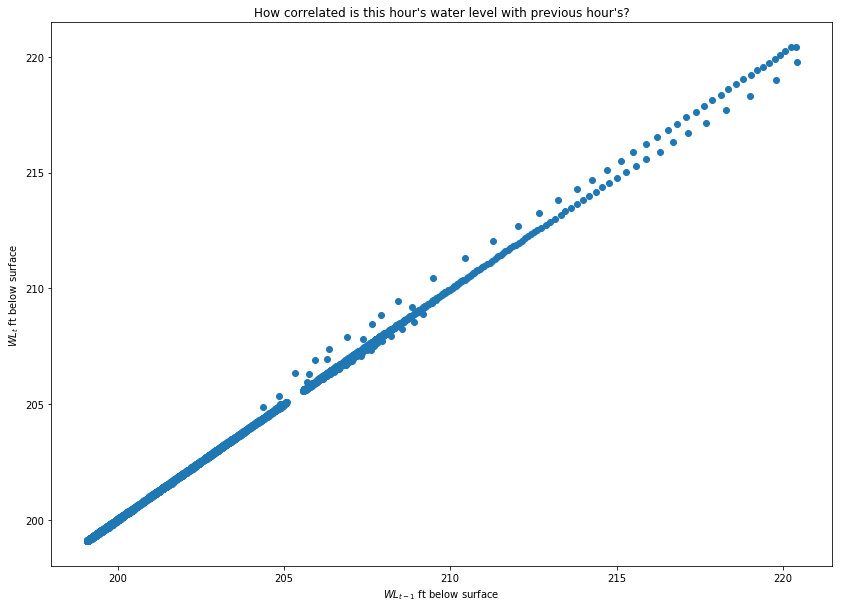

In [13]:
# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(WLtm1,WLt,'o')
plt.title('How correlated is this hour\'s water level with previous hour\'s?')
plt.xlabel('$WL_{t-1}$ ft below surface')
plt.ylabel('$WL_t$ ft below surface')
plt.show()

#5. Save the dataframe as a pandas "pickle" file¶

df.to_pickle('BastropWell_WY2017.pkl')

In [12]:
wl_mean=np.mean(WL)
print(wl_mean)

202.484773875


In [14]:
wl_variance=np.var(WL)
print(wl_variance)

8.87386094519


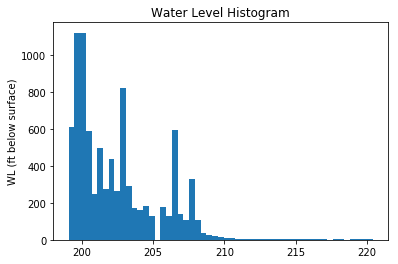

In [17]:
plt.hist(WL, bins='auto')
plt.title('Water Level Histogram')
plt.ylabel('WL (ft below surface)')
plt.show()

In [18]:
R = np.corrcoef(WLtm1,WLt)
R[1,0]

0.99986803884658582

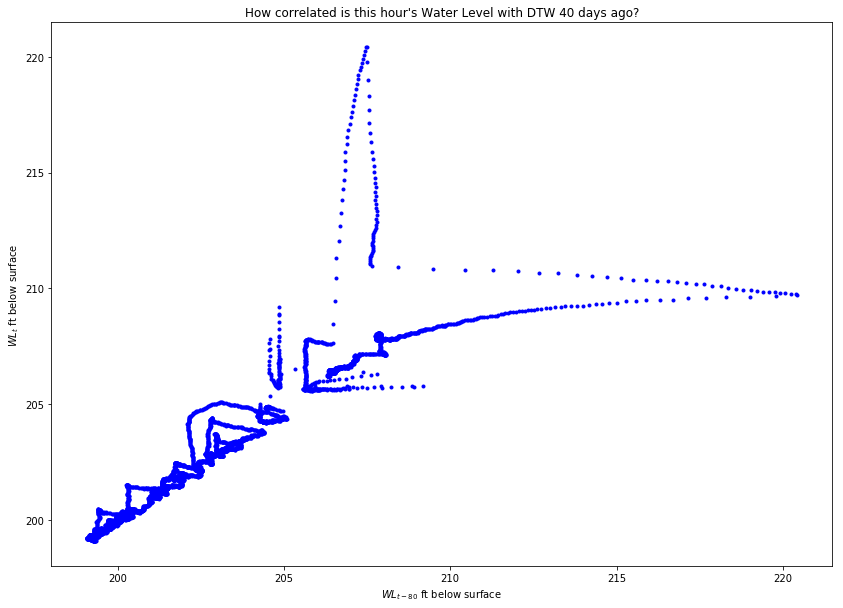

In [28]:
WLt   = WL[80:-1] 
WLtmk = WL[0:-(81)]
# Use Matplotlib to create a scatter plot of these two time series, create a title and label axes
plt.figure(figsize=(14,10))
plt.plot(WLtmk,WLt,'b.')
plt.title('How correlated is this hour\'s Water Level with DTW 40 days ago?')
plt.xlabel('$WL_{t-80}$ ft below surface')
plt.ylabel('$WL_t$ ft below surface')
plt.show()

In [24]:
R = np.corrcoef(WLtmk,WLt)
R[1,0]

0.89181119316286039

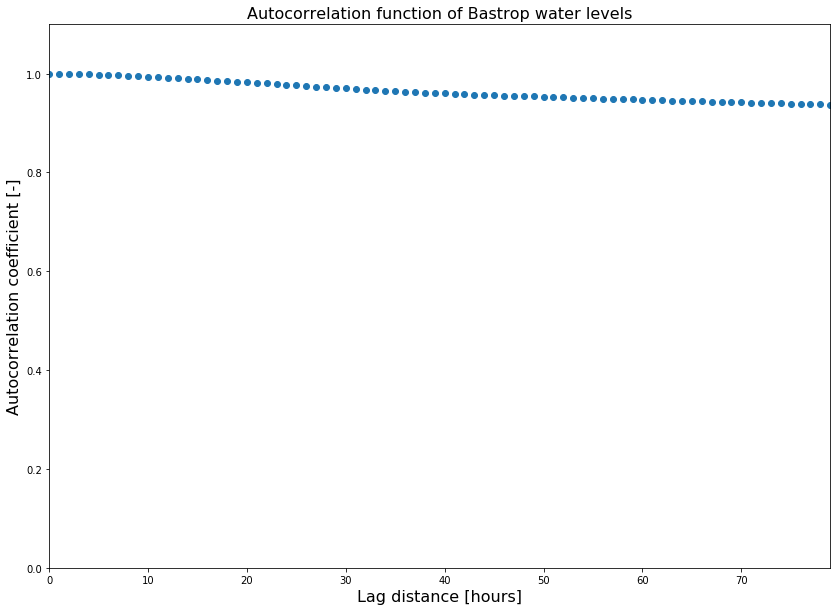

In [27]:

Nk = 80
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    WLt   = WL[k:-1] 
    WLtmk = WL[0:-(1+k)]
    R = np.corrcoef(WLtmk,WLt)
    Rk[k] = R[1,0]
  

plt.figure(figsize=(14,10))
plt.plot(K,Rk,'o')
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(0.0,1.1)
plt.title('Autocorrelation function of Bastrop water levels',fontsize=16)
plt.xlabel('Lag distance [hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()